In [7]:
import numpy as np
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

import torch
import torch.nn as nn # for neural network models
import torch.optim as optim # for optimization 
import torch.nn.init as init # for initialization 

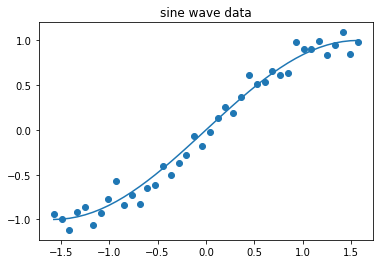

array([[-1.57079633],
       [-1.49024267],
       [-1.40968901],
       [-1.32913535],
       [-1.2485817 ],
       [-1.16802804],
       [-1.08747438],
       [-1.00692072],
       [-0.92636706],
       [-0.84581341],
       [-0.76525975],
       [-0.68470609],
       [-0.60415243],
       [-0.52359878],
       [-0.44304512],
       [-0.36249146],
       [-0.2819378 ],
       [-0.20138414],
       [-0.12083049],
       [-0.04027683],
       [ 0.04027683],
       [ 0.12083049],
       [ 0.20138414],
       [ 0.2819378 ],
       [ 0.36249146],
       [ 0.44304512],
       [ 0.52359878],
       [ 0.60415243],
       [ 0.68470609],
       [ 0.76525975],
       [ 0.84581341],
       [ 0.92636706],
       [ 1.00692072],
       [ 1.08747438],
       [ 1.16802804],
       [ 1.2485817 ],
       [ 1.32913535],
       [ 1.40968901],
       [ 1.49024267],
       [ 1.57079633]])

In [18]:
plt.figure()

# true data
N = 40
X = np.linspace(-np.pi/2, np.pi/2, N).reshape(N, 1)
y = np.sin(X)
plt.plot(X, y)

# add noise
y += 0.1*np.random.randn(N, 1)

plt.scatter(X, y)
plt.title('sine wave data')
plt.show()

In [10]:
n_feature = 2

PHI = np.ones(X.shape[0]).reshape(-1, 1)

for i in range(1, n_feature):
    PHI = np.concatenate((PHI, np.power(X, i)), axis=1)

print('PHI.shape: ', PHI.shape) # 40 x 2
print('PHI[:3] \n', PHI[:3])

# shuffle
idx = np.random.permutation(N)
shuffle_X = X[idx]
shuffle_PHI = PHI[idx]
shuffle_y = y[idx]
print(idx)

PHI.shape:  (40, 2)
PHI[:3] 
 [[ 1.         -1.57079633]
 [ 1.         -1.49024267]
 [ 1.         -1.40968901]]
[24 17 13 15 29  1 31 27  7 18  3  4 22 38 19 16  6 36 35 10 12 25  9 34
  5 32 28 33 26 37  0 30  2 14 11 20 21 23 39  8]


In [28]:
n = N-20

# train data
X_train = shuffle_X[:n]
PHI_train = shuffle_PHI[:n]
y_train = shuffle_y[:n]

# test data
X_test = shuffle_X[:]
PHI_test = shuffle_PHI[:]
y_test = shuffle_y[:]

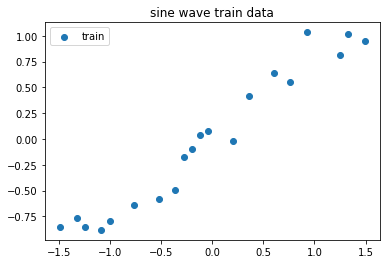

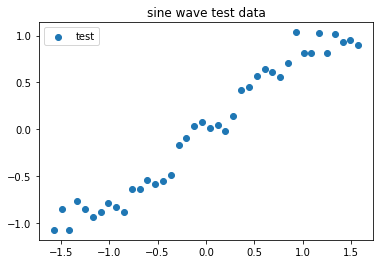

In [12]:
# plot
plt.figure()
plt.scatter(X_train, y_train, label='train')
plt.legend()
plt.title('sine wave train data')
plt.show()

plt.figure()
plt.scatter(X_test, y_test, label='test')
plt.legend()
plt.title('sine wave test data')
plt.show()

In [14]:
W_ = np.linalg.inv(PHI_train.T @ PHI_train) @ PHI_train.T @ y_train
print('[b, W] = W_')
print('W_.shape: ', W_.shape)
print('W_ \n', W_)

[b, W] = W_
W_.shape:  (2, 1)
W_ 
 [[0.02526911]
 [0.72642167]]


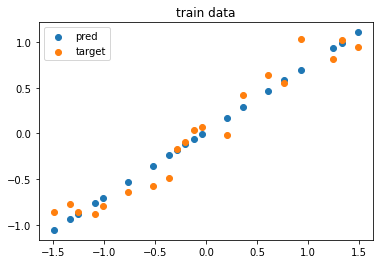

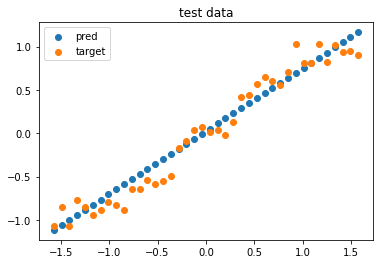

In [20]:
plt.figure()
plt.scatter(X_train, PHI_train @ W_, label='pred')
plt.scatter(X_train, y_train, label='target')
plt.legend()
plt.title('train data')
plt.show()

plt.figure()
plt.scatter(X_test, PHI_test @ W_, label='pred')
plt.scatter(X_test, y_test, label='target')
plt.legend()
plt.title('test data')
plt.show()

In [16]:
reg = LinearRegression()
reg.fit(X_train, y_train)

print('b: ', reg.intercept_)
print('W: ', reg.coef_)

b:  [0.02526911]
W:  [[0.72642167]]


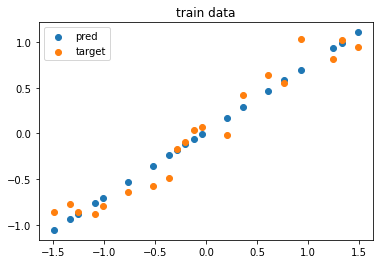

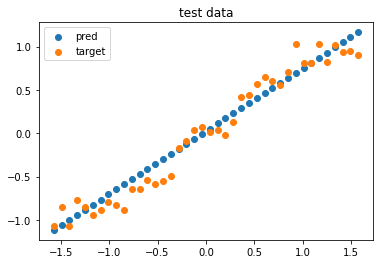

In [17]:
plt.figure()
plt.scatter(X_train, reg.predict(X_train), label='pred')
plt.scatter(X_train, y_train, label='target')
plt.legend()
plt.title('train data')
plt.show()

plt.figure()
plt.scatter(X_test, reg.predict(X_test), label='pred')
plt.scatter(X_test, y_test, label='target')
plt.legend()
plt.title('test data')
plt.show()

In [29]:
PHI_train = torch.tensor(PHI_train, dtype = torch.float)
label = torch.tensor(y_train, dtype = torch.float)
PHI_test = torch.tensor(PHI_test, dtype = torch.float)

In [30]:
model = nn.Linear(n_feature, 1, bias = False)
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr = 0.1)

for i in range(50):
    optimizer.zero_grad()
    
    output = model(PHI_train)
    loss = loss_function(output, label)
    
    loss.backward()
    
    optimizer.step()
    
    if i % 10 == 0:
        print(loss.data)
        
param_list = list(model.parameters())
print('W_ \n', param_list[0][0][0])
print('W_ \n', param_list[0][0][1])

tensor(0.3372)
tensor(0.0334)
tensor(0.0241)
tensor(0.0238)
tensor(0.0238)
W_ 
 tensor(0.0252, grad_fn=<SelectBackward>)
W_ 
 tensor(0.7263, grad_fn=<SelectBackward>)
